<a href="https://colab.research.google.com/drive/1dzij9bQsExdym3KN0y4OO8K5YzjQUaEW" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [3]:
print(tf.__version__)

2.12.0


# Explore data

In [5]:
import os
print("Train data: ")
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/MLOps-K8S/image_intel/archive/seg_train/seg_train"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
print("Test data: ")
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/MLOps-K8S/image_intel/archive/seg_test/seg_test"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
print("Prediction data: ")
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/MLOps-K8S/image_intel/archive/seg_pred/seg_pred"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

Train data: 
There are 6 directories and 0 images in '/content/drive/MyDrive/MLOps-K8S/image_intel/archive.zip (Unzipped Files)/seg_train/seg_train'.
There are 0 directories and 2271 images in '/content/drive/MyDrive/MLOps-K8S/image_intel/archive.zip (Unzipped Files)/seg_train/seg_train/forest'.
There are 0 directories and 2191 images in '/content/drive/MyDrive/MLOps-K8S/image_intel/archive.zip (Unzipped Files)/seg_train/seg_train/buildings'.
There are 0 directories and 2404 images in '/content/drive/MyDrive/MLOps-K8S/image_intel/archive.zip (Unzipped Files)/seg_train/seg_train/glacier'.
There are 0 directories and 2512 images in '/content/drive/MyDrive/MLOps-K8S/image_intel/archive.zip (Unzipped Files)/seg_train/seg_train/mountain'.
There are 0 directories and 2274 images in '/content/drive/MyDrive/MLOps-K8S/image_intel/archive.zip (Unzipped Files)/seg_train/seg_train/sea'.
There are 0 directories and 2382 images in '/content/drive/MyDrive/MLOps-K8S/image_intel/archive.zip (Unzipped F

In [6]:
import random
import matplotlib.pyplot as plt
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder+'/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');
  print(f"Image shape {img.shape}")

  return img

Image shape (150, 150, 3)


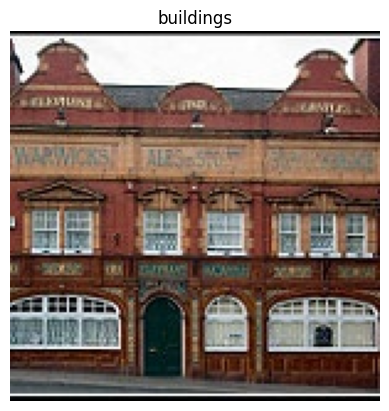

In [7]:
img = view_random_image(target_dir='/content/drive/MyDrive/MLOps-K8S/image_intel/archive/seg_train/seg_train/',
                  target_class='buildings')

In [8]:
import pathlib
data_dir = pathlib.Path("/content/drive/MyDrive/MLOps-K8S/image_intel/archive/seg_train/seg_train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)
Image shape (150, 150, 3)


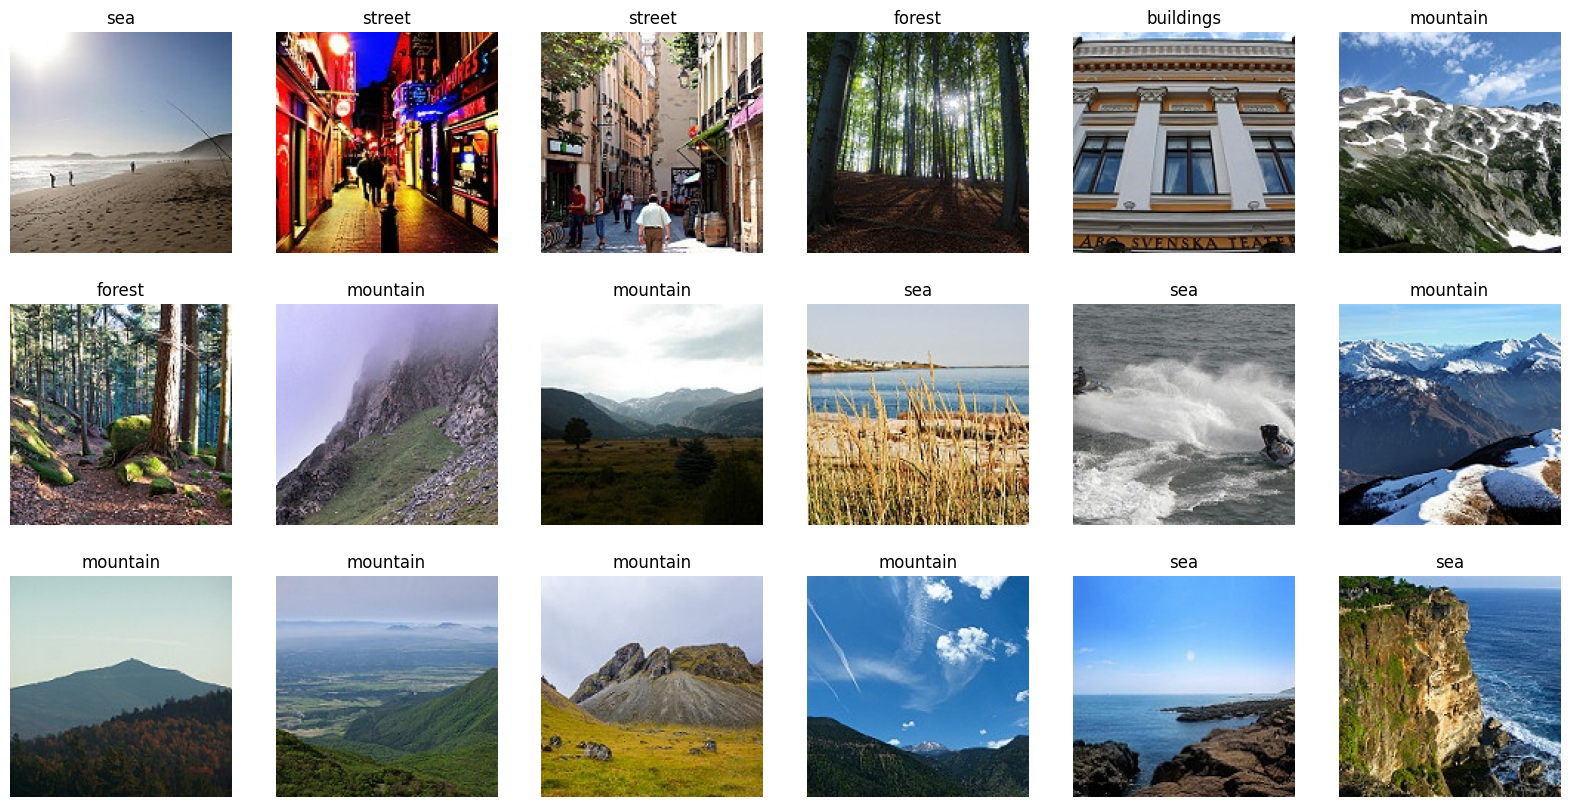

In [9]:
plt.figure(figsize=(20, 10))
for i in range(18):
  plt.subplot(3, 6, i+1)
  class_name = random.choice(class_names)
  img = view_random_image(target_dir='/content/drive/MyDrive/MLOps-K8S/image_intel/archive/seg_train/seg_train/',
                  target_class=class_name)

# Prepare data for model

In [10]:
train_dir = "/content/drive/MyDrive/MLOps-K8S/image_intel/archive/seg_train/seg_train/"
test_dir = "/content/drive/MyDrive/MLOps-K8S/image_intel/archive/seg_test/seg_test/"

In [11]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = val_datagen.flow_from_directory(test_dir,
                                           target_size=(150,150),
                                           batch_size=32,
                                           class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# Basic model Buildinig (CNN Classifier)

In [12]:
model_1 = Sequential([
  Conv2D(16, 3, padding='same', activation='relu', input_shape=(150,150,3)),
  MaxPool2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPool2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(128, activation='relu'),
  Dense(len(class_names), activation='softmax')
])

model_1.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [13]:
history_1 = model_1.fit(train_data,
                    epochs=4,
                    batch_size=32,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/4
439/439 [==============================] - 2238s 5s/step - loss: 1.0410 - accuracy: 0.5969 - val_loss: 0.8554 - val_accuracy: 0.7020
Epoch 2/4
439/439 [==============================] - 126s 288ms/step - loss: 0.7700 - accuracy: 0.7147 - val_loss: 0.5882 - val_accuracy: 0.7917
Epoch 3/4
439/439 [==============================] - 126s 287ms/step - loss: 0.6871 - accuracy: 0.7426 - val_loss: 0.6731 - val_accuracy: 0.7543
Epoch 4/4
439/439 [==============================] - 125s 285ms/step - loss: 0.6336 - accuracy: 0.7634 - val_loss: 0.5973 - val_accuracy: 0.7860


In [14]:
model_1.evaluate(test_data)

94/94 [==============================] - 8s 83ms/step - loss: 0.5973 - accuracy: 0.7860


[0.5972545146942139, 0.7860000133514404]

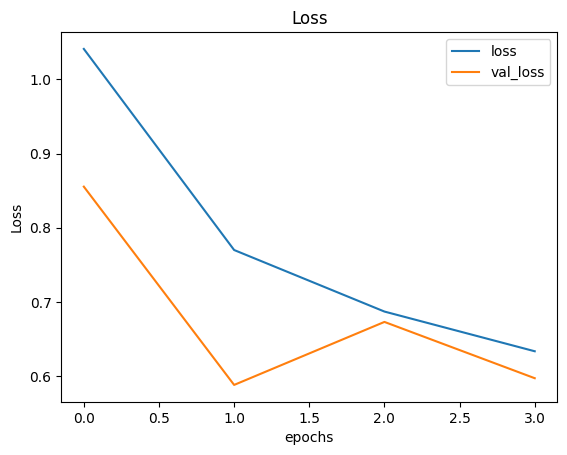

In [15]:
pd.DataFrame(history_1.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss');

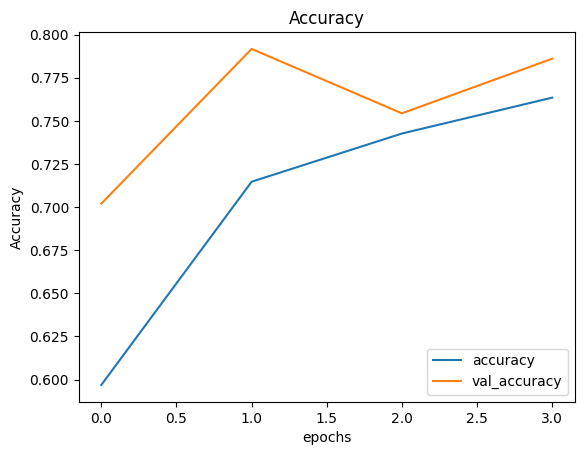

In [16]:
pd.DataFrame(history_1.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy');

In [17]:
model_1.save('/content/drive/MyDrive/MLOps-K8S/image_intel/archive/models/', save_format='tf')

In [20]:
!ls -alrt /content/drive/MyDrive/MLOps-K8S/image_intel/archive/models

total 214
drwx------ 2 root root   4096 Jul 31 15:30 variables
-rw------- 1 root root 189210 Jul 31 15:30 saved_model.pb
-rw------- 1 root root  20230 Jul 31 15:30 keras_metadata.pb
-rw------- 1 root root     56 Jul 31 15:30 fingerprint.pb
drwx------ 2 root root   4096 Jul 31 15:30 assets


In [21]:
model_loaded = tf.keras.models.load_model('/content/drive/MyDrive/MLOps-K8S/image_intel/archive/models/')

In [22]:
model_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [23]:
from PIL import Image
import numpy as np
from skimage import transform
def process(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')
   np_image = transform.resize(np_image, (150, 150, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

In [29]:
pred_label=model_loaded.predict(process('/content/drive/MyDrive/MLOps-K8S/image_intel/archive/seg_pred/seg_pred/3.jpg'))

1/1 [==============================] - 0s 21ms/step


In [30]:
pred_label

array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

In [27]:
!zip -r models.zip /content/drive/MyDrive/MLOps-K8S/image_intel/archive/models

  adding: content/drive/MyDrive/MLOps-K8S/image_intel/archive/models/ (stored 0%)
  adding: content/drive/MyDrive/MLOps-K8S/image_intel/archive/models/variables/ (stored 0%)
  adding: content/drive/MyDrive/MLOps-K8S/image_intel/archive/models/variables/variables.data-00000-of-00001 (deflated 24%)
  adding: content/drive/MyDrive/MLOps-K8S/image_intel/archive/models/variables/variables.index (deflated 63%)
  adding: content/drive/MyDrive/MLOps-K8S/image_intel/archive/models/assets/ (stored 0%)
  adding: content/drive/MyDrive/MLOps-K8S/image_intel/archive/models/fingerprint.pb (stored 0%)
  adding: content/drive/MyDrive/MLOps-K8S/image_intel/archive/models/saved_model.pb (deflated 88%)
  adding: content/drive/MyDrive/MLOps-K8S/image_intel/archive/models/keras_metadata.pb (deflated 91%)
